# Customer Service Requests Analysis

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import dataset
customer_service_df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', dtype='str')

In [3]:
# Get first 5 records
customer_service_df.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.86568154,-73.92350096,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.77594531,-73.91509394,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.87032452,-73.88852464,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.83599405,-73.8283794,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.73305962,-73.87416976,"(40.733059618956815, -73.87416975810375)"


#### 1.1. Identify the shape of the dataset

In [4]:
customer_service_df.shape

(300698, 53)

In [5]:
# dataset colums
customer_service_df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

#### 1.2. Identify variables with null values

In [6]:
na_cols = customer_service_df.isna().sum()
na_cols[na_cols > 0]

Closed Date                         2164
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Due Date                               3
Resolution Action Updated Date      2187
X Coordinate (State Plane)          3540
Y Coordinate (State Plane)          3540
School Region                          1
School Code                            1
School Zip                             1
School or Citywide Complaint      300698
Vehicle Type                      300698
Taxi Company Borough              300698
Taxi Pick Up Loc

#### 2.1. Utilize missing value treatment
#### 2.2. Analyze the date column and remove the entries if it has an incorrect timeline

In [7]:
# Convert datatype to datetime for columns
customer_service_df['Created Date'] = pd.to_datetime(customer_service_df['Created Date'])
customer_service_df['Closed Date'] = pd.to_datetime(customer_service_df['Closed Date'])
customer_service_df['Due Date'] = pd.to_datetime(customer_service_df['Due Date'])
customer_service_df['Resolution Action Updated Date'] = pd.to_datetime(customer_service_df['Resolution Action Updated Date'])

In [8]:
# comvert longitude and latitude to numeric
customer_service_df['Longitude'] = pd.to_numeric(customer_service_df['Longitude'])
customer_service_df['Latitude'] = pd.to_numeric(customer_service_df['Latitude'])

In [9]:
# Drop columns with all NaN values
customer_service_df.dropna(axis=1, how='all', inplace=True)

In [10]:
# Updated columns
customer_service_df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Ferry Direction', 'Ferry Terminal Name', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [11]:
# Add new column Request_Closing_Time in hours
customer_service_df['Request_Closing_Time'] = customer_service_df['Closed Date'] - customer_service_df['Created Date']
customer_service_df['Request_Closing_Time'] = customer_service_df['Request_Closing_Time'].apply(lambda x: x.total_seconds()/3600)

In [12]:
customer_service_df['Request_Closing_Time'][:5]

0    0.920833
1    1.437778
2    4.858611
3    7.753889
4    3.450556
Name: Request_Closing_Time, dtype: float64

In [13]:
customer_service_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 49 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      300698 non-null  object        
 1   Created Date                    300698 non-null  datetime64[ns]
 2   Closed Date                     298534 non-null  datetime64[ns]
 3   Agency                          300698 non-null  object        
 4   Agency Name                     300698 non-null  object        
 5   Complaint Type                  300698 non-null  object        
 6   Descriptor                      294784 non-null  object        
 7   Location Type                   300567 non-null  object        
 8   Incident Zip                    298083 non-null  object        
 9   Incident Address                256288 non-null  object        
 10  Street Name                     256288 non-null  object 

We have lots of columns, but we are mostly focusing on created date, closing date, due date, request closing time, location, complaint type, city, angency, longitude, latitude so that we can get some insight from it.

In [14]:
cs_df = customer_service_df[
    ['Created Date', 'Closed Date', 'Due Date', 'Request_Closing_Time', 'Complaint Type',
     'Location Type', 'City', 'Agency', 'Latitude', 'Longitude']]
cs_df.head()

,Created Date,Closed Date,Due Date,Request_Closing_Time,Complaint Type,Location Type,City,Agency,Latitude,Longitude
0,2015-12-31 23:59:45,2016-01-01 00:55:00,2016-01-01 07:59:00,0.920833,Noise - Street/Sidewalk,Street/Sidewalk,NEW YORK,NYPD,40.865682,-73.923501
1,2015-12-31 23:59:44,2016-01-01 01:26:00,2016-01-01 07:59:00,1.437778,Blocked Driveway,Street/Sidewalk,ASTORIA,NYPD,40.775945,-73.915094
2,2015-12-31 23:59:29,2016-01-01 04:51:00,2016-01-01 07:59:00,4.858611,Blocked Driveway,Street/Sidewalk,BRONX,NYPD,40.870325,-73.888525
3,2015-12-31 23:57:46,2016-01-01 07:43:00,2016-01-01 07:57:00,7.753889,Illegal Parking,Street/Sidewalk,BRONX,NYPD,40.835994,-73.828379
4,2015-12-31 23:56:58,2016-01-01 03:24:00,2016-01-01 07:56:00,3.450556,Illegal Parking,Street/Sidewalk,ELMHURST,NYPD,40.733060,-73.874170


In [15]:
# check for NaN
cs_df.isna().sum()

Created Date               0
Closed Date             2164
Due Date                   3
Request_Closing_Time    2164
Complaint Type             0
Location Type            131
City                    2614
Agency                     0
Latitude                3540
Longitude               3540
dtype: int64

We have 300698 records in total. So we can easily drop the records with NaN values.

In [16]:
cs_df.dropna(inplace=True)
cs_df.shape

(296939, 10)

We can now start analysing with different plots and get rid of outliers.

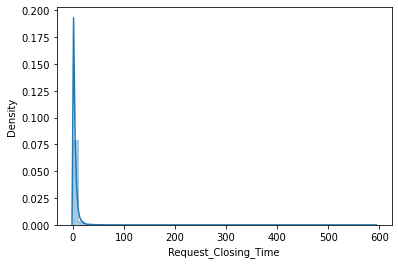

In [17]:
# Closing time distribution
sns.distplot(cs_df['Request_Closing_Time'])
plt.show()

Most of the requests get completed within 0-20 hours, but there is few outliers. We can check in box-plot.

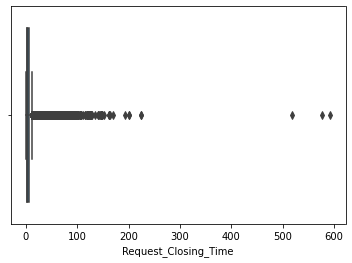

In [18]:
sns.boxplot(cs_df['Request_Closing_Time'])
plt.show()

In [19]:
# Check for outliers
np.percentile(cs_df['Request_Closing_Time'], 99)

26.136777777777752

In [20]:
# % of extreme values
cs_df[cs_df['Request_Closing_Time'] <= 30].shape[0] / cs_df.shape[0]

0.9925944385883969

In [21]:
#We can remove the outliers.
cs_df = cs_df[cs_df['Request_Closing_Time'] < 30]

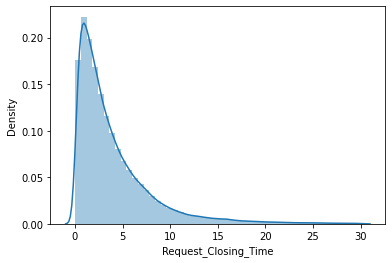

In [22]:
# check distribution again
sns.distplot(cs_df['Request_Closing_Time'])
plt.show()

Most of the cases get resolved within 0-15 hours and few of them take more time.

#### 2.3. Draw a frequency plot for city-wise complaints

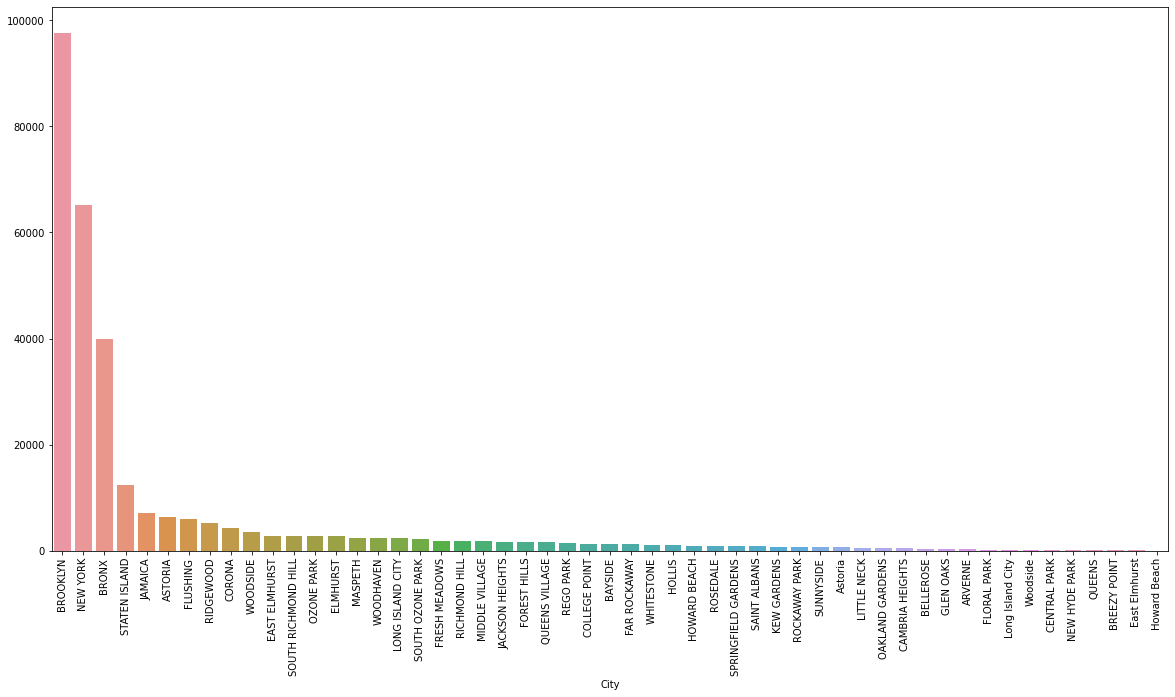

In [23]:
city_complaints = cs_df.groupby('City').size().sort_values(ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(city_complaints.index, city_complaints)
plt.xticks(rotation=90)
plt.show()

Brooklyn, New York and Bronk cities have much higer complaints.

#### 2.4. Draw scatter and hexbin plots for complaint concentration across Brooklyn

In [44]:
cs_df_brooklyn = cs_df[cs_df['City'] == 'BROOKLYN']

In [45]:
cs_df_brooklyn.shape

(97666, 9)

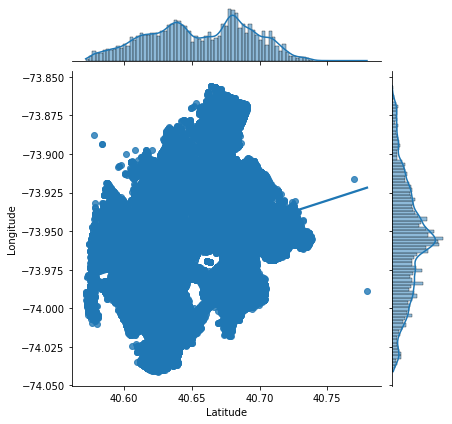

In [46]:
sns.jointplot('Latitude', 'Longitude', data=cs_df_brooklyn, kind='reg')

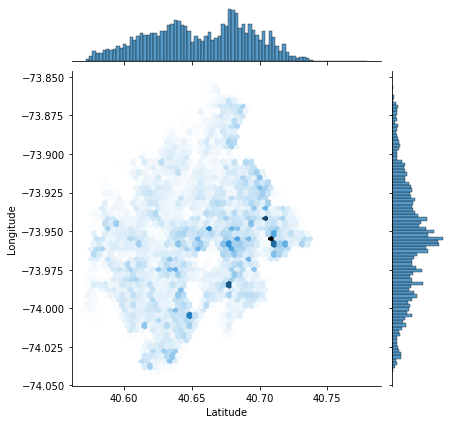

In [47]:
sns.jointplot('Latitude', 'Longitude', data=cs_df_brooklyn, kind='hex')

#### 3.1. Plot a bar graph of count vs. complaint types

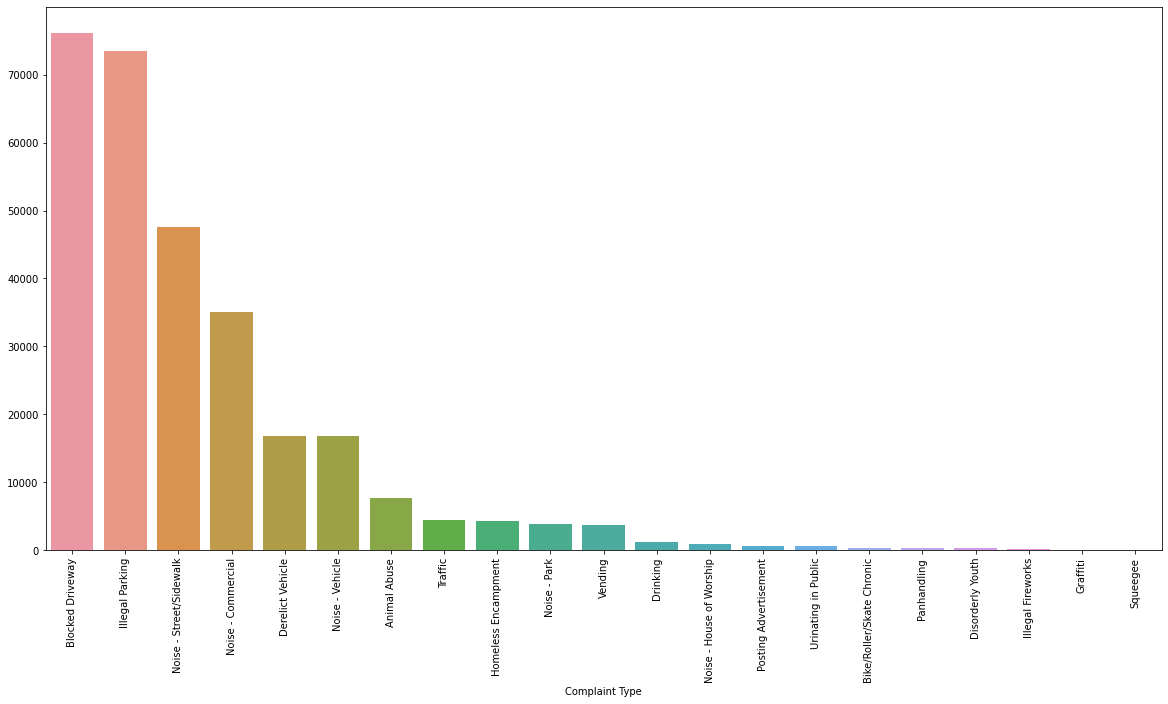

In [24]:
complaints_counts = cs_df.groupby('Complaint Type').size().sort_values(ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(complaints_counts.index, complaints_counts)
plt.xticks(rotation=90)
plt.show()

In the city, most of the cases are for blocked driveway, illegal parking and noise. As NYC is a large busy city. We can expect such insights.

#### 3.2. Find the top 10 types of complaints

In [25]:
complaints_counts[:10]

Complaint Type
Blocked Driveway           76155
Illegal Parking            73528
Noise - Street/Sidewalk    47543
Noise - Commercial         35027
Derelict Vehicle           16897
Noise - Vehicle            16792
Animal Abuse                7663
Traffic                     4440
Homeless Encampment         4335
Noise - Park                3917
dtype: int64

#### 3.3. Display the types of complaints in each city in a separate dataset

In [26]:
city_complaints = cs_df[['City', 'Complaint Type']].groupby('City')['Complaint Type'].value_counts()

In [27]:
city_complaints

City      Complaint Type         
ARVERNE   Illegal Parking             58
          Animal Abuse                38
          Blocked Driveway            35
          Noise - Street/Sidewalk     29
          Derelict Vehicle            27
                                    ... 
Woodside  Illegal Parking            100
          Blocked Driveway            11
          Noise - Street/Sidewalk      5
          Derelict Vehicle             2
          Noise - Commercial           2
Name: Complaint Type, Length: 760, dtype: int64

In [28]:
# Agency
cs_df['Agency'].nunique()

1

We have only NYPD operating on all these areas. As it has a single value. We can get rid of it.

In [29]:
cs_df.drop('Agency', axis=1, inplace=True)

#### 4. Visualize the major types of complaints in each city

In [30]:
complaintsTypes = cs_df['Complaint Type'].values.tolist()
len(complaintsTypes)

294739

In [31]:
# Unique complaints
len(set(complaintsTypes))

21

In [32]:
complaints = ' '.join(complaintsTypes) + ' '

In [33]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(complaints)

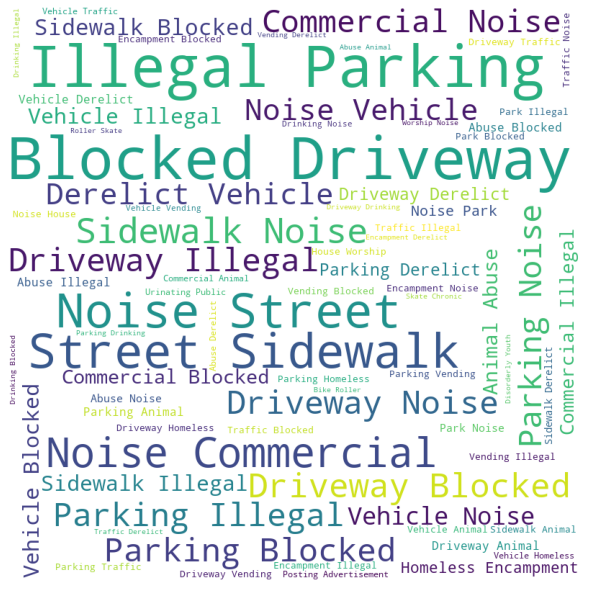

In [34]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#### 5. Check if the average response time across various types of complaints

Average response time can refer to the request closing time.

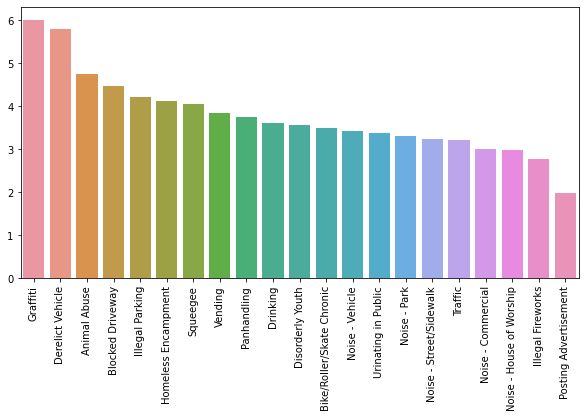

In [35]:
closing_time_per_type = cs_df.groupby('Complaint Type').mean()['Request_Closing_Time'].sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(closing_time_per_type.index.values, closing_time_per_type.values)
plt.xticks(rotation=90)
plt.show()

There is not much difference among the closing times for all these complaint types. But we ca say, Derelict Vehicle and Graffiti take more than to resolved than others.

#### 6. Identify significant variables by performing a statistical analysis using p-values and chi-square values (Optional)

We can pick few columns against the complaint type to see whether thet are significant or not with chi-sqaure test.

In [36]:
features = ['Request_Closing_Time', 'Location Type', 'City']
target = 'Complaint Type'

In [37]:
for feature in features:
    cs_cat_df_cross_tab = pd.crosstab(index=cs_df[target], columns=cs_df[feature])
    print('P-value in chi-square test for {} : {}'.format(feature, chi2_contingency(cs_cat_df_cross_tab)[1]))

P-value in chi-square test for Request_Closing_Time : 1.0
P-value in chi-square test for Location Type : 0.0
P-value in chi-square test for City : 0.0


So we can say, Location Type and City are highly correlated with Complaint Type, where are Request_Closing_Time is not as it has p-value more than 0.5.